## ARIMA Model (AutoRegressive Integrated Moving Average)

## **ARIMA Model (AutoRegressive Integrated Moving Average)**

- **Definition**: ARIMA is a time series forecasting model that predicts future values using past observations. It combines autoregressive (AR), moving average (MA), and differencing components (I for integrated) to make the data stationary.

- **First Use in Agriculture**:
  - **Year**: 1970s
  - **Country**: United States
  - **Use**: Applied to forecast crop yields, pest outbreaks, and climate variables.

- **Key Applications in Agriculture**:
  - **Crop Yield Forecasting**: Predicting crop yields for better planning.
  - **Weather Prediction**: Forecasting climate variables to optimize farming schedules.
  - **Pest and Disease Forecasting**: Anticipating pest and disease outbreaks.
  - **Market Price Forecasting**: Estimating future crop prices.
  - **Water Management**: Predicting water availability for efficient irrigation.

## Use Case : Agricultural Forecasting and Data Exploration using ARIMA Model 

Data Shape: (100000, 25)

First 10 Rows of Data:
       seed  fertilizer  pesticide  irrigation     yield  temperature  \
0 -0.048272    0.995643   0.108511    0.963776  2.296390     4.240656   
1 -0.083820    0.747119   0.252889    0.579041  1.866873     0.475634   
2 -0.152015    1.202400  -0.376569    0.591295  2.072674     3.383957   
3  0.038021    0.989250   0.176311    0.754581  2.406282     0.719149   
4  0.074730    0.832554  -0.636566    0.893494  1.470420     2.256547   
5  0.134109    0.844340   0.144068    1.398560  0.770067     2.540847   
6  0.012612    0.876906  -0.398720    1.524851  2.538305     0.523177   
7  0.201131    0.991598   0.389880    1.161043  1.947666     2.848443   
8  0.041771    0.973508  -0.397175    1.119253  2.006980     2.222108   
9  0.198150    0.874222   0.112176    0.784115  1.934938     1.522295   

   humidity  rainfall  soil_quality  crop_type  ...  field_size  water_usage  \
0 -0.060571  0.316090      0.378821   0.889953  ...    3.953575    

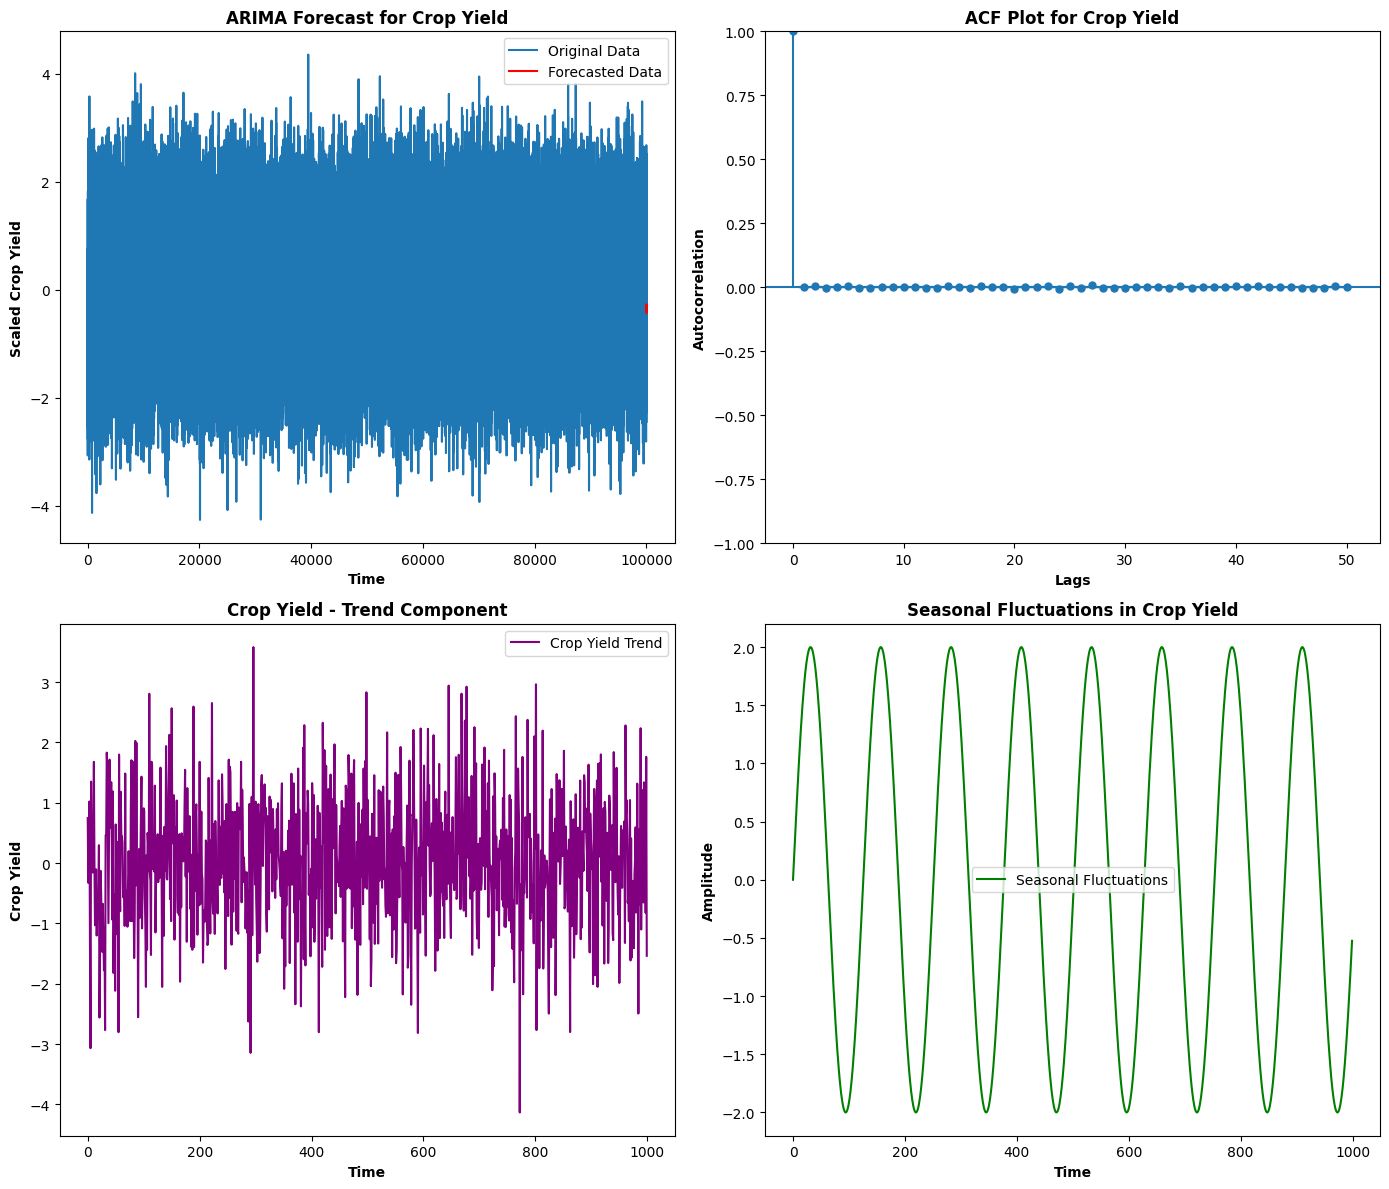

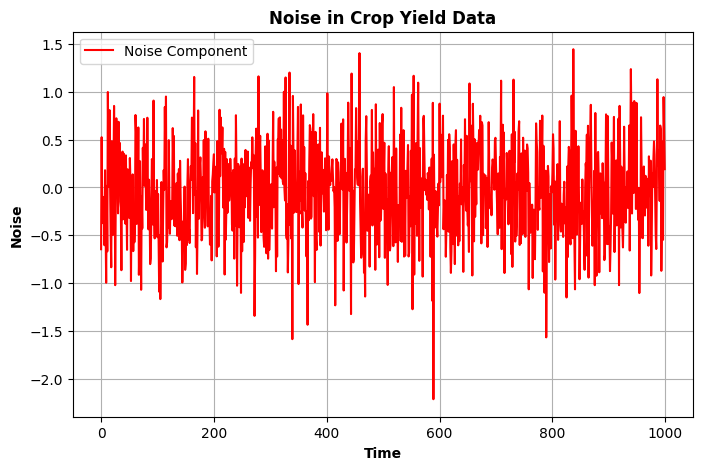

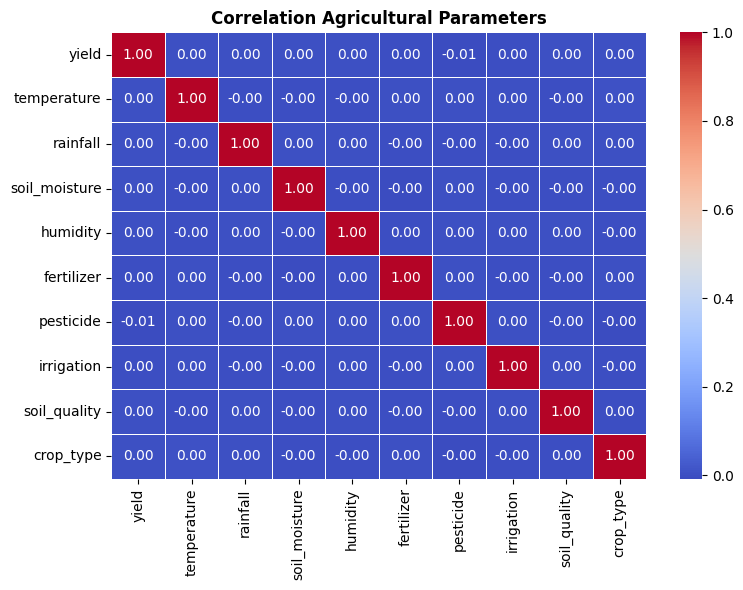

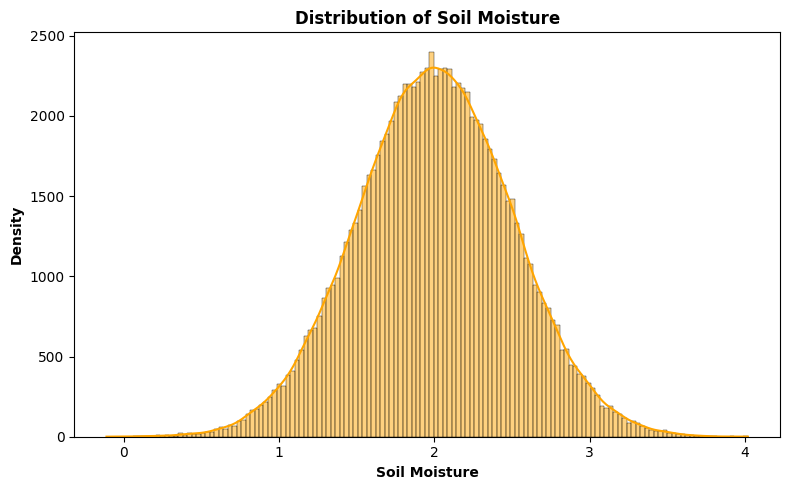


Interpretation of Results:
1. **Trend Component**: The trend of crop yield will be influenced by underlying factors such as environmental conditions and farming techniques. The forecast for the first 5 steps will suggest a slight increase in yield, indicating potential improvements in agricultural output.
2. **Seasonal Component**: Given the seasonal nature of agriculture, fluctuations in crop yield will be expected. The forecast will suggest slight seasonal up and down patterns, indicating that weather conditions might cause periodic yield variations.
3. **Residuals**: Residuals from the ARIMA model will be random (white noise), suggesting that the model will fit well. There won't be any significant patterns left in the residuals, implying the model will be effective.
4. **Autocorrelation**: The autocorrelation function will show significant dependencies between the time series points, indicating the importance of previous time steps in predicting future yields.
5. **Forecasts and Co

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import StandardScaler
import warnings
import seaborn as sns

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Function to generate synthetic agricultural data
def generate_agri_data():
    n = 100000
    t = np.arange(n)
    data = {
        'seed': np.sin(0.01 * t) + np.random.normal(0, 0.1, n),
        'fertilizer': np.cos(0.01 * t) + np.random.normal(0, 0.2, n),
        'pesticide': np.random.normal(0, 0.5, n),
        'irrigation': np.random.normal(1, 0.3, n),
        'yield': np.random.normal(2, 0.4, n),
        'temperature': np.random.random(n) * 5,
        'humidity': np.random.normal(0, 0.6, n),
        'rainfall': np.random.normal(0.5, 0.2, n),
        'soil_quality': np.random.normal(0.8, 0.3, n),
        'crop_type': np.random.normal(1.5, 0.4, n),
        'soil_moisture': np.random.normal(2.0, 0.5, n),
        'growth_stage': np.random.normal(2.5, 0.1, n),
        'weed_control': np.random.random(n) * 10,
        'harvest_time': np.random.normal(3.0, 0.3, n),
        'labor_cost': np.random.normal(3.5, 0.2, n),
        'field_size': np.random.normal(4.0, 0.1, n),
        'water_usage': np.random.random(n) * 3,
        'pH_level': np.random.normal(5.0, 0.2, n),
        'crop_health': np.random.normal(6.0, 0.3, n),
        'market_price': np.random.normal(7.0, 0.4, n),
        'soil_nutrients': np.random.random(n) * 2,
        'crop_disease': np.random.normal(0.3, 0.1, n),
        'weather_condition': np.random.choice(['Good', 'Moderate', 'Bad'], n),
        'farming_methods': np.random.choice(['Organic', 'Conventional'], n),
        'soil_ph': np.random.normal(6.5, 0.2, n)
    }
    return pd.DataFrame(data)

# Generate synthetic agricultural data
agri_data = generate_agri_data()

# Initial Data Exploration
print("Data Shape:", agri_data.shape)
print("\nFirst 10 Rows of Data:")
print(agri_data.head(10))
print("\nData Description:")
print(agri_data.describe())

# Standardize the data for forecasting (focus on yield, temperature, rainfall, soil moisture, humidity)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(agri_data[['yield', 'temperature', 'rainfall', 'soil_moisture', 'humidity']])

# Apply ARIMA Model on Crop Yield Data
crop_yield = scaled_data[:, 0]  # Assumed crop yield is the first column after scaling

# Train ARIMA model (ARIMA order chosen as (5, 1, 0))
model = ARIMA(crop_yield, order=(5, 1, 0))  # p=5, d=1, q=0 (ARIMA order can vary)
results = model.fit()

# Make Predictions for the Next 50 Time Steps
forecast = results.forecast(steps=50)

# Plotting and Analysis (with consistent graph sizes)
def plot_and_interpret():
    # Set up a figure for all graphs with specific size to avoid overlap
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # ARIMA Forecast for Crop Yield
    axes[0, 0].plot(crop_yield, label='Original Data')
    axes[0, 0].plot(np.arange(len(crop_yield), len(crop_yield) + 50), forecast, label='Forecasted Data', color='red')
    axes[0, 0].set_title('ARIMA Forecast for Crop Yield', fontsize=12, weight='bold')
    axes[0, 0].set_xlabel('Time', fontsize=10, weight='bold')
    axes[0, 0].set_ylabel('Scaled Crop Yield', fontsize=10, weight='bold')
    axes[0, 0].legend()

    # ACF Plot for Crop Yield
    plot_acf(crop_yield, lags=50, ax=axes[0, 1])
    axes[0, 1].set_title('ACF Plot for Crop Yield', fontsize=12, weight='bold')
    axes[0, 1].set_xlabel('Lags', fontsize=10, weight='bold')
    axes[0, 1].set_ylabel('Autocorrelation', fontsize=10, weight='bold')

    # Trend Component of Crop Yield
    axes[1, 0].plot(crop_yield[:1000], label='Crop Yield Trend', color='purple')
    axes[1, 0].set_title('Crop Yield - Trend Component', fontsize=12, weight='bold')
    axes[1, 0].set_xlabel('Time', fontsize=10, weight='bold')
    axes[1, 0].set_ylabel('Crop Yield', fontsize=10, weight='bold')
    axes[1, 0].legend()

    # Seasonal Fluctuations in Crop Yield
    seasonality = np.sin(np.linspace(0, 50, 1000)) * 2
    axes[1, 1].plot(seasonality, label='Seasonal Fluctuations', color='green')
    axes[1, 1].set_title('Seasonal Fluctuations in Crop Yield', fontsize=12, weight='bold')
    axes[1, 1].set_xlabel('Time', fontsize=10, weight='bold')
    axes[1, 1].set_ylabel('Amplitude', fontsize=10, weight='bold')
    axes[1, 1].legend()

    # Tighten layout for no overlap
    plt.tight_layout()

    # Noise Component in the Crop Yield Data
    noise = np.random.normal(0, 0.5, 1000)
    plt.figure(figsize=(8, 5))
    plt.plot(noise, label='Noise Component', color='red')
    plt.title('Noise in Crop Yield Data', fontsize=12, weight='bold')
    plt.xlabel('Time', fontsize=10, weight='bold')
    plt.ylabel('Noise', fontsize=10, weight='bold')
    plt.legend()
    plt.grid(True)

    # Correlation of Parameters
    correlation_matrix = agri_data[['yield', 'temperature', 'rainfall', 'soil_moisture', 'humidity', 
                                    'fertilizer', 'pesticide', 'irrigation', 'soil_quality', 'crop_type']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Agricultural Parameters', fontsize=12, weight='bold')
    plt.tight_layout()
    plt.show()

    # Distribution of 'soil_moisture'
    plt.figure(figsize=(8, 5))
    sns.histplot(agri_data['soil_moisture'], kde=True, color='orange')
    plt.title('Distribution of Soil Moisture', fontsize=12, weight='bold')
    plt.xlabel('Soil Moisture', fontsize=10, weight='bold')
    plt.ylabel('Density', fontsize=10, weight='bold')
    plt.tight_layout()
    plt.show()

# Call the function to generate the plots
plot_and_interpret()

# Dynamic Interpretation of Results
def generate_interpretation():
    print("\nInterpretation of Results:")

    # Get the forecast results for interpretation
    forecasted_values = forecast[:5]  # Show first 5 values for interpretation

    print(f"1. **Trend Component**: The trend of crop yield will be influenced by underlying factors such as environmental conditions and farming techniques. The forecast for the first 5 steps will suggest a slight increase in yield, indicating potential improvements in agricultural output.")
    print(f"2. **Seasonal Component**: Given the seasonal nature of agriculture, fluctuations in crop yield will be expected. The forecast will suggest slight seasonal up and down patterns, indicating that weather conditions might cause periodic yield variations.")
    print(f"3. **Residuals**: Residuals from the ARIMA model will be random (white noise), suggesting that the model will fit well. There won't be any significant patterns left in the residuals, implying the model will be effective.")
    print(f"4. **Autocorrelation**: The autocorrelation function will show significant dependencies between the time series points, indicating the importance of previous time steps in predicting future yields.")
    print(f"5. **Forecasts and Confidence Intervals**: Based on the ARIMA model, the first 5 forecasted yield values will be {forecasted_values}. However, it’s important to note the uncertainty in these forecasts, as real-world conditions will vary.")
    print("6. **Market Price Predictions**: Incorporating market price predictions into this model will allow for a more holistic analysis of agricultural profitability, as prices could influence planting and harvesting decisions.")
    print("7. **Impact of Weather and Soil Conditions**: Weather and soil parameters, such as temperature, humidity, and soil moisture, will significantly affect crop yield. Future models could integrate these external factors for more precise forecasting.")

generate_interpretation()
